# Programación lineal

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="300px" height="250px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="350px" height="250px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- https://repositorio.unal.edu.co/handle/unal/8418?show=full

## 1. Apuntes históricos

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="250px" height="300px" />


- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="175px" />

## 2. Problemas de programación lineal

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

In [ ]:
# Paso 1. Identificar el criterio de optimización (minimizar o maximizar)
#         minimizar coste
# Paso 2. Definir las variables que me ayuden a encontrar el objetivo
#         Las variables deben representar masa (en gramos)
#         Variables: xA -> cantidad en gramos del producto A
#                    xB -> cantidad en gramos del producto B
# Paso 3. Definir el criterio de optimización:
def coste(xA,xB):
  return 0.6*xA + 0.2*xB
# Paso 4. Identificar las restricciones en función de las variables definidas
# Nota importante: Definir las ecuaciones en el mismo orden que el criterio de optimización
#
#         Proteinas:  0.3*xA+0.05*xB >= 25 (gramos)
#         Grasas:    0.01*xA+0.07*xB >= 6
#         Azucares:   0.1*xA+ 0.1*xB >= 30
def proteinas(xA):
  return (25-0.3*xA)/0.05
def grasas(xA):
  return (6-0.01*xA)/0.07
def azucares(xA):
  return (30-0.1*xA)/0.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

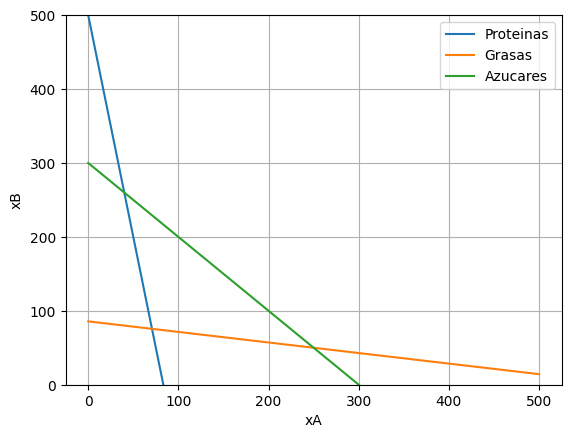

In [ ]:
# Gráficas
xA=np.linspace(0,500,100)
plt.plot(xA,proteinas(xA),label='Proteinas')
plt.plot(xA,grasas(xA),label='Grasas')
plt.plot(xA,azucares(xA),label='Azucares')
plt.legend()
plt.ylim(0,500)
plt.xlabel('xA')
plt.ylabel('xB')
plt.grid()

In [ ]:
# Evaluamos en 4 puntos:
# 1. el punto donde xA=0
# 2. el cruce de las restricciones entre proteinas y azucares
# 3. el cruce de las restricciones entre grasas y azucares
# 4. el punto donde xB=0 en la restricción de grasas
#
# punto 1
proteinas(0) # punto en xB donde xA=0

500.0

In [ ]:
coste(0,proteinas(0)) # Costo del primer punto

100.0

In [ ]:
import sympy as sym

In [ ]:
# punto 2
# Encontramos la solución para 'xA'
xA=sym.Symbol('xA')
sym.solve(proteinas(xA)-azucares(xA),xA)

[40.0000000000000]

In [ ]:
# Para encontrar 'xB' evaluamos xA=40 en la función de proteinas o azucares
azucares(40),proteinas(40)

(260.0, 260.0)

In [ ]:
coste(40,azucares(40))

76.0

In [ ]:
# Punto 3
sym.solve(grasas(xA)-azucares(xA),xA)

[250.000000000000]

In [ ]:
coste(250,azucares(250))

160.0

In [ ]:
# Punto 4
sym.solve(grasas(xA),xA)

[600.000000000000]

In [ ]:
# xB=0
grasas(600)

0.0

In [ ]:
coste(600,0)

360.0

**Resultado:**

El costo mínimo del compuesto es de 76 u.m. y se consigo con 40 gramos del producto **A** y 260 gramos de **B**.

---

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves.

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche.

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias?

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

**Solución:**

*Paso 1:* Se desea maximizar la ganancia. Los datos requeridos para ello son
* Se obtiene 600 u.m. por carrocería de camión,
* se obtiene 200 u.m. por carrocería de automóvil.

*Paso 2:* Se definen las variables como:
* $x_C$: Unidades de carrorecía de camión,
* $x_A$: Unidades de carrocería de automóvil.

In [ ]:
# Paso 3: Criterio de optimización
#
def ganancia(xC,xA):
  return 600*xC+200*xA

*Paso 4:* Resricciones

> ¿Qué impide que los variables $x_C$ y $x_A$ tiendan a infinito para conseguir ganancia infinita?
* Días operario para la nave **A**: $7x_C+2x_A\leq300$,
* días operario para la nave **B**: $3x_C+3x_A\leq270$.

In [ ]:
# Regresamos el valor de xC que satisfaga cada restricción exactamente
def operarioA(xA):
  xC=(300-2*xA)/7
  return xC
def operarioB(xA):
  xC=(270-3*xA)/3
  return xC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

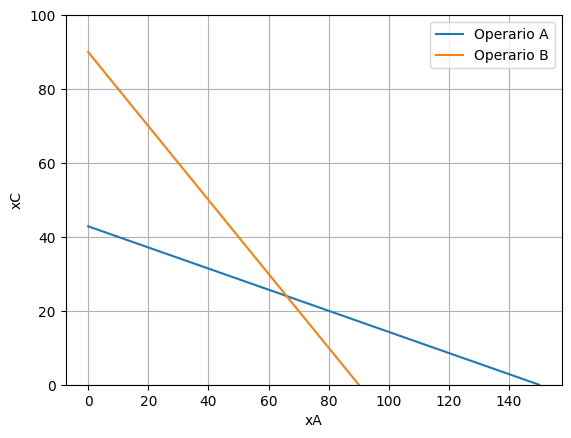

In [ ]:
# Método gráfico
xA=np.linspace(0,150,100)
plt.plot(xA,operarioA(xA),label='Operario A')
plt.plot(xA,operarioB(xA),label='Operario B')
plt.legend()
plt.ylim(0,100)
plt.xlabel('xA')
plt.ylabel('xC')
plt.grid()

La solución debe cumplir las siguientes dos condiciones:
1. Satisfacer ambos días operario. La solución debe estar por debajo de ambas líneas,
2. alejarse lo más posible del origen para maximizar la ganancia. Los puntos a comparar con el criterio de optimización son:
    1. $x_A=0$ para la restricción de la nave **A**,
    2. el cruce de ambas restricciones,
   3. $x_C=0$ para la restricción de la nave **B**.

In [ ]:
# Punto 1
operarioA(0) # xC. Usamos xC=42 (para satisfacer los días disponibles)

42.857142857142854

In [ ]:
ganancia(42,0)

25200

In [ ]:
import sympy as sym

In [ ]:
# Punto 2
xA=sym.Symbol('xA')
sym.solve(operarioA(xA)-operarioB(xA),xA) # Solución para xA

[66]

In [ ]:
operarioA(66) # Solución para xC

24.0

In [ ]:
ganancia(24,66)

27600

In [ ]:
# Punto 3
sym.solve(operarioB(xA),xA) # Solución para xA

[90]

In [ ]:
operarioB(90) # xC=0

0.0

In [ ]:
ganancia(0,90)

18000

**Resultado:**

La ganancia máxima es 27600 u.m. y se consigue fabricando 24 carrocerías de camión y 66 de automóvil.

---

## 3. ¿Cómo se resuelve en python?

### 3.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/images/logo.svg" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería.

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

In [ ]:
import scipy.optimize as opt

# Importar el módulo optimize de la librería scipy

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices. Entre ellas se encuentra la función `linprog`

---

In [ ]:
opt.linprog?

### 3.2 Solución del ejemplo básico con linprog
Ya hicimos la solución gráfica. Contrastemos con la solución que nos da `linprog`

El problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_A,x_B} & 0.6x_A+0.2x_B \\
\text{s. a. }  & -0.3x_A-0.05x_B\leq -25 \\
               & -0.01x_A-0.07x_B\leq -6 \\
               & -0.1x_A-0.1x_B\leq -30,
\end{array}
\end{equation}

O de forma equivalente:

- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

In [ ]:
# Criterio de optimización
c=np.array([0.6,0.2])      # Coeficientes positivos para minimizar
# Restricciones
#
A=np.array([[-0.3,-0.05],  # Proteínas. Coeficientes negativos para restricciones con signo >=
            [-0.01,-0.07], # Grasas
            [-0.1,-0.1]])  # Azúcares
b=np.array([-25,-6,-30])   # Límites. Mismo signo que el renglón correspondiente

In [ ]:
opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 76.0
              x: [ 4.000e+01  2.600e+02]
            nit: 2
          lower:  residual: [ 4.000e+01  2.600e+02]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.260e+01  0.000e+00]
                 marginals: [-1.600e+00 -0.000e+00 -1.200e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

`linprog` nos regresa un objeto con diferentes atributos:
* `fun`: criterio minimizado. Resultado de evaluar los coeficientes de `c` en las variables optimizadas,
* `x`: las variables optimizadas en el orden asignado desde los coeficientes de `c`,
* `ineqlin.residual`: son los excedentes de las restricciones (en el mismo orden que los renglones de `A` y `b`).

Esto es, el costo mínimo es de 76 u.m. y se consigue con 40 g del producto **A** y 260 g del producto **B**, con un excedente en grasa de 12.6 g.

---

In [ ]:
# Ejemplo de carrocerías
c=np.array([-600,-200])  # orden: xC,xA. Coeficientes negativos para maximizar
A=np.array([[7,2],       # Nave A. Coeficientes positivos para signo <=
            [3,3]])      # Nave B
b=np.array([300,270])

opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -27600.0
              x: [ 2.400e+01  6.600e+01]
            nit: 2
          lower:  residual: [ 2.400e+01  6.600e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-8.000e+01 -1.333e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

**Resultado:** La ganancia máxima es de 27600 u.m. y se consigue con 24 unidades de carrocería de camión y 66 de automóvil.

---

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudiante, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, pase al frente para explicarlo y le subiré la nota de alguna tarea a 100.**

**Solución:**

Se desea maximizar la ganancia. Se sabe que por cada par de aretes, se obtienen $\$15$ y por cada cadena, $\$20$; se define entonces:
* $x_a$: par de aretes vendidos/creados.
* $x_c$: cadenitas vendidas/creadas.

**Criterio de optimización:**
$$
\max [15\quad20]\begin{bmatrix}x_a\\x_c\end{bmatrix}=\min [-15\quad-20]\begin{bmatrix}x_a\\x_c\end{bmatrix}
$$
sujeto a las siguientes restricciones:
* De tiempo: $0.5x_a+x_c\leq10$
* De material: $x_a+x_c\leq15$.

In [ ]:
import numpy as np
import scipy.optimize as opt

In [ ]:
c=np.array([-15,-20])
A=np.array([[0.5,1],[1,1]])
b=np.array([10,15])
opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -250.0
              x: [ 1.000e+01  5.000e+00]
            nit: 2
          lower:  residual: [ 1.000e+01  5.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-1.000e+01 -1.000e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

**Respuesta:**

Se necesitan hacer $10$ pares de aretes y $5$ cadenitas para obtener una ganancia de $\$250$.

---

## 4. Problema de transporte 1
- **Referencia**: http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

Una  empresa tiene dos factorías A y B.  En ellas  se fabrica un determinado  producto, a razón de 600  y 500 unidades por día respectivamente.  El producto  ha  de  ser distribuido posteriormente  a  tres  centros  C,  D  y  E,  que  requieren,  respectivamente,  200,  300  y  400  unidades.  Los  costos  de  transportar cada unidad del producto desde cada factoría a cada centro distribuidor son los  indicados  en la tabla  siguiente:

Factoría|C|D|E|Fabricación (Unidades)
:----|----|----|----|----
A|  50 u.m|60 u.m|10 u.m|600 u
B|  25 u.m|40 u.m|20 u.m|500 u
Demanda|200|300|400|

**¿De qué manera  deben  organizar  el transporte a fin de que los gastos sean mínimos?**


Formulemos el problema para ser resuelto por la programación lineal con
- $x_1$: unidades transportadas de la factoría "A" al centro "C"
- $x_2$: unidades transportadas de la factoría "A" al centro "D"
- $x_3$: unidades transportadas de la factoría "A" al centro "E"
- $x_4$: unidades transportadas de la factoría "B" al centro "C"
- $x_5$: unidades transportadas de la factoría "B" al centro "D"
- $x_6$: unidades transportadas de la factoría "B" al centro "E"

**Solución:**

Se desea minimizar gastos de transporte, donde los costos se presentan por unidad de cada fábrica a cada centro (lo que corresponde a la definición de las variables), por lo que el criterio de optimización es:
$$
\min[50,60,10,\;25,40,20]x,
$$
donde $x=[x_1,x_2,x_3,x_4,x_5,x_6]^T$. Bajo las siguientes restriccioes:
* De fabricación:
  - fábrica **A**: $x_1+x_2+x_3\leq600$,
  - fábrica **B**: $x_4+x_5+x_6\leq500$.
* De demanda:
  - centro **C**: $x_1+x_4\geq200$,
  - centro **D**: $x_2+x_5\geq300$,
  - centro **E**: $x_3+x_6\geq400$.

In [ ]:
c=np.array([50,60,10,25,40,20])
A=np.array([[ 1, 1, 1, 0, 0, 0],  # Restricciones de fabricación (signo positivo para la desigualdad <= )
            [ 0, 0, 0, 1, 1, 1],  #
            [-1, 0, 0,-1, 0, 0],  # Restricciones deee... demanda (signo negativo para la desigualdad >= )
            [ 0,-1, 0, 0,-1, 0],  #
            [ 0, 0,-1, 0, 0,-1]]) #
b=np.array([600,500,              # Los signos deben ser consistentes con las restricciones (positivos)
            -200,-300,-400])      # Signos negativos (sonsistentes con las últimas tres restricciones)

opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 21000.0
              x: [ 0.000e+00  0.000e+00  4.000e+02  2.000e+02  3.000e+02
                   0.000e+00]
            nit: 3
          lower:  residual: [ 0.000e+00  0.000e+00  4.000e+02  2.000e+02
                              3.000e+02  0.000e+00]
                 marginals: [ 2.500e+01  2.000e+01  0.000e+00  0.000e+00
                              0.000e+00  1.000e+01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 2.000e+02  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
                 marginals: [-0.000e+00 -0.000e+00 -2.5

**Respuesta:** El gasto mínimo es de 21000 u.m., con la siguiente distribución:
* Fábrica **A**: 400 unidades al centro **E**,
* Fábrica **B**: 200 unidades al centro **C** y 300 unidades al centro **D**.

---

In [ ]:
# Si la fábrica A solo puede hacer 500 y la fábrica B solo puede hacer 400
#
A=np.array([[ 1, 1, 1, 0, 0, 0],  # Restricciones de fabricación
            [ 0, 0, 0, 1, 1, 1],  #
            [-1, 0, 0,-1, 0, 0],  # Restricciones deee... demanda
            [ 0,-1, 0, 0,-1, 0],  #
            [ 0, 0,-1, 0, 0,-1]]) #
b=np.array([500,400,-200,-300,-400])

opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 23000.0
              x: [ 0.000e+00  1.000e+02  4.000e+02  2.000e+02  2.000e+02
                   0.000e+00]
            nit: 4
          lower:  residual: [ 0.000e+00  1.000e+02  4.000e+02  2.000e+02
                              2.000e+02  0.000e+00]
                 marginals: [ 5.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  3.000e+01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
                 marginals: [-0.000e+00 -2.000e+01 -4.5

In [ ]:
# Especificando las restricciones de demanda como igualdad
#
# Restricciones de desigualdad
A=np.array([[ 1, 1, 1, 0, 0, 0],  # Restricciones de fabricación
            [ 0, 0, 0, 1, 1, 1]]) #
b=np.array([500,400])
#
# Restricciones de igualdad
Ae=np.array([[1, 0, 0, 1, 0, 0],  # Restricciones deee... demanda
            [ 0, 1, 0, 0, 1, 0],  #
            [ 0, 0, 1, 0, 0, 1]])
be=np.array([200,300,400])

opt.linprog(c,      # Criterio de optimización
            A,b,    # Restricciones de desigualdad
            Ae,be)  # Restricciones de igiualdad

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 23000.0
              x: [ 0.000e+00  1.000e+02  4.000e+02  2.000e+02  2.000e+02
                   0.000e+00]
            nit: 1
          lower:  residual: [ 0.000e+00  1.000e+02  4.000e+02  2.000e+02
                              2.000e+02  0.000e+00]
                 marginals: [ 5.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  3.000e+01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [ 4.500e+01  6.000e+01  1.000e+01]
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -2.000e+01]
 

## 5. Otro problema de dieta
A una persona que quiere adelgazar se le ofrecen dos productos, $A$ y $B$, para que tome una mezcla de ambos con las siguientes recomendaciones:
* No debe tomar más de $150$ g de la mezcla ni menos de $50$ g.
* La cantidad de $A$ debe ser igual o superior a la de $B$.
* No debe incluir más de $100$ g de $A$.

Si $100$ g de $A$ contiene $30$ mg de vitaminas y $450$ calorías y, $100$ g de $B$ contienen 20 mg de vitaminas y $150$ calorías:
* ¿Cuántos gramos de cada producto debe mezclar para obtener el preparado más rico en
vitaminas?
* ¿Y el más pobre en calorías?

**Primer objetivo: maximizar vitaminas:**

Se sabe que la composición de **A** es de $30\;\mathrm{mg}$ de vitaminas por cada $100\;\mathrm{g}$ de éste, y la composición de **B** es de $20\;\mathrm{mg}$ por cada $100\;\mathrm{g}$. Se definen, entonces, las variables:
* $x_A$, como la cantidad en gramos del compuesto **A**,
* $x_B$, como la cantidad en gramos del compuesto **B**.

Por lo que, el criterio de optimización es:
$$
\min_{x_A,x_B} (-0.030x_A-0.020x_B),
$$
sujeto a las siguientes restricciones:
* Rango de la mezcla
  * $x_A+x_B\leq150$
  * $x_A+x_B\geq50\equiv-x_A-x_B\leq-50$
* Relación entre **A** y **B**
  * $x_A\geq x_B\equiv-x_A+x_B\leq0$
* Límite del compuesto **A**
  * $x_A\leq100$

In [1]:
import numpy as np
import scipy.optimize as opt

In [4]:
c=np.array([-0.30,-0.20]) # mg
A=np.array([[1,1],
            [-1,-1],
            [-1,1],
            [1,0]])
b=np.array([150,-50,0,100])

opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -40.0
              x: [ 1.000e+02  5.000e+01]
            nit: 2
          lower:  residual: [ 1.000e+02  5.000e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.000e+02  5.000e+01  0.000e+00]
                 marginals: [-2.000e-01 -0.000e+00 -0.000e+00 -1.000e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

**Resultado:**

La mezcla que máximiza el consumo de vitaminas es de $100\,\mathrm{g}$ del compuesto **A** y $50\,\mathrm{g}$ del compuesto **B**, consumiento $4\,\mathrm{g}$ de vitaminas.

Adicionalmente, se observa que, la mezcla es $100\,\mathrm{g}$ mayor que el rango inferior y, en la relación entre **A** y **B**, una diferencia de $50\,\mathrm{g}$.

---

**Segundo objetivo:**

Conservando las variables $x_A$ y $x_B$, para minimizar la cantidad de calorias de la mezcla, el criterio de optimización resulta:
$$
\min_{x_A,x_B}(4.5x_A+1.5x_B),
$$
bajo las mismas resticciones.

In [5]:
c=np.array([4.5,1.5])

opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 150.0
              x: [ 2.500e+01  2.500e+01]
            nit: 2
          lower:  residual: [ 2.500e+01  2.500e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 1.000e+02  0.000e+00  0.000e+00  7.500e+01]
                 marginals: [-0.000e+00 -3.000e+00 -1.500e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

**Resultado:**

El consumo mínimo de calorias es de $150\,\mathrm{cal}$ con $25\,\mathrm{g}$ de **A** y $25\,\mathrm{g}$ de **B**.

Se observa también que, el rango de la mezcla está $100\,\mathrm{g}$ por debajo del límite superior, que la diferencia entre **A** y **B** es cero y el compuesto **A** está $75\,\mathrm{g}$ por debajo de su límite máximo.